In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [2]:
Data = "FT Global Business School MBA Ranking 2024.csv"
ColumnsWantedForSummaryStats = ["Value for money rank", "Salary percentage increase", "Overall satisfaction **"]
ColumnsForDataset = ["#", "School Name", "International students (%)", "International faculty (%)",  "Value for money rank", "Career progress rank", "Careers service rank"]
Rank = "#"  # Column for sorting
SchoolName = "School Name"
requiredrank = 10
PctIntlStudents = "International students (%)"
PctIntlFaculty = "International faculty (%)"
RankNames = "Value for money rank", "Career progress rank", "Careers service rank"
university_column = 'School Name'



In [3]:
# Function reading the csv file
def readData(df):
    return pd.read_csv(df, encoding='ISO-8859-1')    

In [12]:
df = pd.read_csv(Data, encoding='ISO-8859-1')
def summaryStatistics(df, Col):
    df = df[Col]
    SumStats = df.describe(exclude=["O"]).reset_index()
    Median = df.median(numeric_only=True)
    Median_df = pd.DataFrame(Median).T  # Transpose to match the structure of SumStats
    SumStats = pd.concat([SumStats, Median_df], ignore_index=True)
    SumStats.fillna("median", inplace=True)
    SumStats.set_index("index", inplace=True)
    return SumStats

SummaryStatistics = summaryStatistics(df, ColumnsWantedForSummaryStats)
print(SummaryStatistics)


        Value for money rank  Salary percentage increase  \
index                                                      
count             100.000000                  100.000000   
mean               50.500000                  117.960000   
std                29.011492                   34.675675   
min                 1.000000                   40.000000   
25%                25.750000                   89.000000   
50%                50.500000                  121.500000   
75%                75.250000                  139.000000   
max               100.000000                  229.000000   
median             50.500000                  121.500000   

        Overall satisfaction **  
index                            
count                100.000000  
mean                   8.875580  
std                    0.491156  
min                    7.655000  
25%                    8.602500  
50%                    8.964000  
75%                    9.198500  
max                    9.975000  

In [5]:
def cleanData(df, ColToSort, Columns, RanksRequired):
    # Convert sorting column to numeric (ignoring errors) and sort by that column
    df[ColToSort] = pd.to_numeric(df[ColToSort], errors='coerce')
    df1 = df.sort_values(by=ColToSort).dropna()
    df1 = df1[Columns].head(RanksRequired)    
    return df1

In [6]:
def PiePlot(df, col, labels_col):
    data = df[[col, labels_col]].dropna().sort_values(by=col, ascending=False)
    values = data[col]
    labels = data[labels_col]
    plt.figure(figsize=(8, 8))
    plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.title(f'Breakdown of {col} by School', pad=40)
    plt.axis('equal')  
    plt.show()
    return "Pie Chart displayed"

In [15]:
def tripleBarPlot(df, Col, RankCols):
    num_ranks = len(RankCols)
    universities = df[Col] #No of Universities
    barWidth = 1 / (num_ranks + 1)
    r = np.arange(len(universities))    
    for i, rank_col in enumerate(RankCols):
        plt.bar(r + i * barWidth, df[rank_col], width=barWidth, edgecolor='grey', label=rank_col)
    
    plt.xlabel('Universities', fontweight='bold')
    plt.ylabel('Rank')
    plt.title('University Rank Comparison')
    plt.xticks(r + (num_ranks / 2 - 0.5) * barWidth, universities, rotation=45, ha='right')
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.tight_layout()
    plt.show()
    return "Chart"

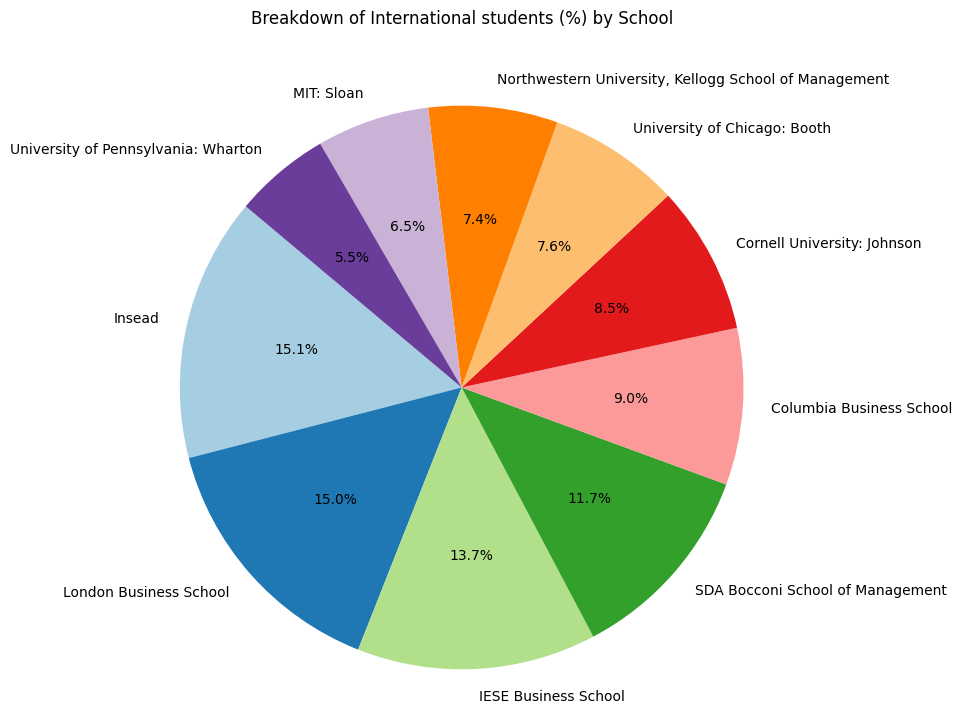

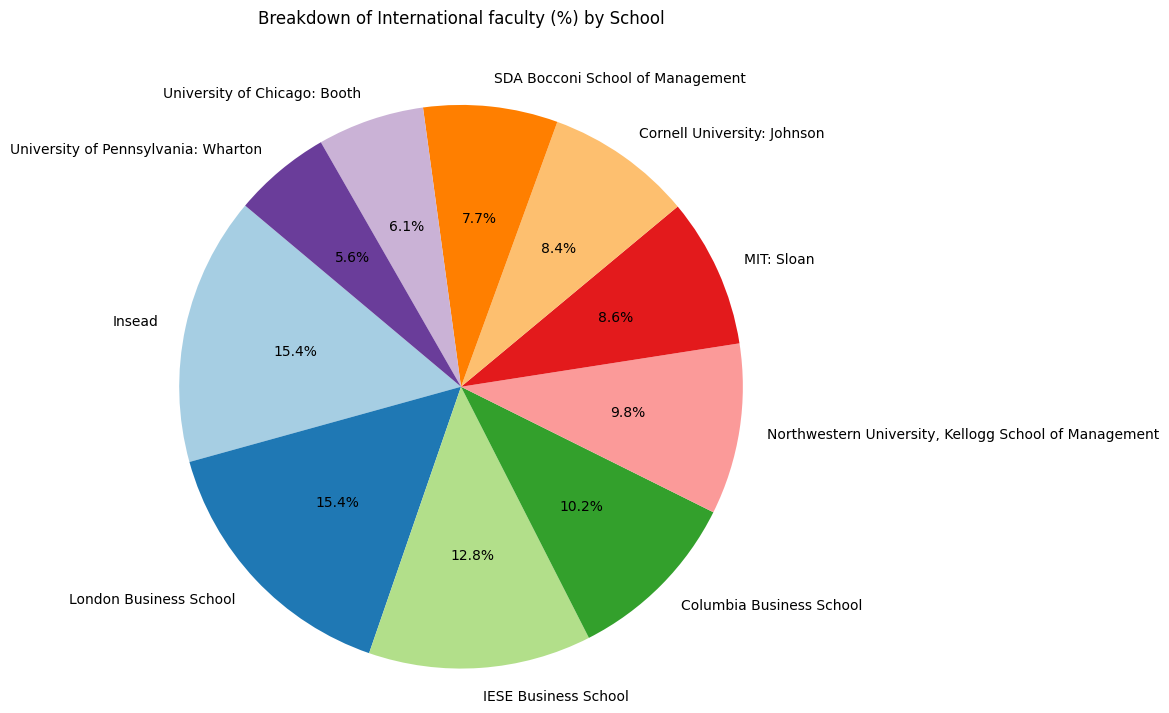

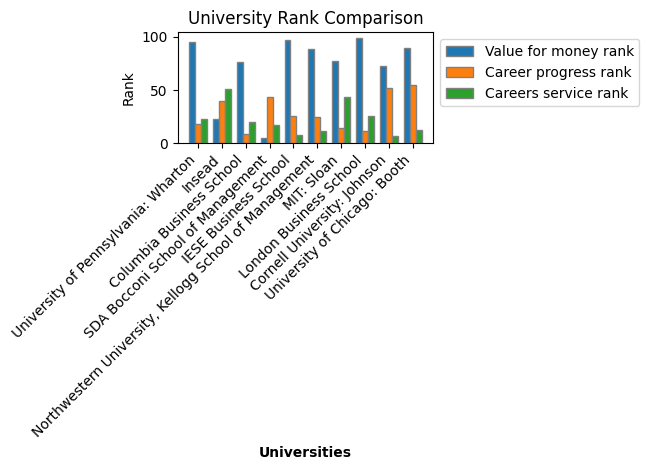

In [16]:
Dataset = readData(Data)
SummaryStatistics = summaryStatistics(Dataset, ColumnsWantedForSummaryStats)
CleanData = cleanData(Dataset, Rank, ColumnsForDataset, requiredrank)
piePlotStudents = PiePlot(CleanData, PctIntlStudents, SchoolName)
piePlotFaculty = PiePlot(CleanData, PctIntlFaculty, SchoolName)
BarChart = tripleBarPlot(CleanData, SchoolName, RankNames)